 ## Fetching data from openml using scikit learn

In [28]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [29]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [30]:
X, y = mnist['data'],mnist['target']
X.shape

(70000, 784)

In [31]:
y.shape

(70000,)

## Plotting a row of data for show the image (28x28) pixel

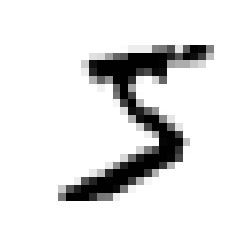

In [32]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [33]:
y[0]

'5'

In [34]:
import numpy as np
y = y.astype(np.uint8)

In [35]:
y[0]

5

The MNIST dataset is already splitted with the trainning_set and test_set

In [36]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a binary Classifier

In [37]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)
y_train_5[0]

True

## Picking and training the classifier Stochastic Gradient Descent(SGD)

In [38]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol= 1e-3,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
sgd_clf.predict([some_digit])

array([ True])

## Measuring Acurracy using cross-validation

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints 0.9502, 0.96565 and 0.96495

0.96355
0.93795
0.95615


In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96355, 0.93795, 0.95615])

In [42]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

## Confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53057,  1522],
       [ 1325,  4096]], dtype=int64)

## Precision and Recall

In [45]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7290850836596654

In [46]:
recall_score(y_train_5, y_train_pred)

0.7555801512636044

In [47]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7420962043663375

## Precision/Recall Tradeoff

In [48]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2412.53175101])

In [49]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [50]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method='decision_function')

In [51]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

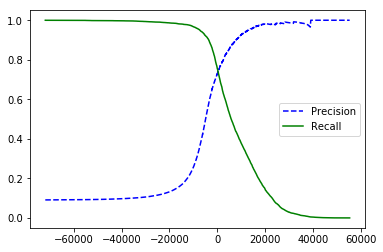

In [52]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### We want a precision over 90%

In [54]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [55]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [56]:
precision_score(y_train_5, y_train_pred_90)

0.9000380083618396

In [57]:
recall_score(y_train_5, y_train_pred_90)

0.4368197749492714

In [60]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9611778893101814